In [5]:
!pip install apyori

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=54e6b39083587f3e63ab0eb978e705f4d437645b05811f625c63ab4106b15ce5
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\77\3d\a6\d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori


In [8]:
from apyori import apriori

In [11]:
!pip install mlxtend

                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB 119.1 kB/s eta 0:00:12
                                              0.0/1.4 MB 119.1 kB/s eta 0:00:12
                                              0.0/1.4 MB 119.1 kB/s eta 0:00:12
     -                                        0.0/1.4 MB 98.1 kB/s eta 0:00:15
     -                                        0.0/1.4 MB 98.1 kB/s eta 0:00:15
     -                                        0.1/1.4 MB 126.1 kB/s eta 0:00:12
     -                                        0.1/1.4 MB 126.1 kB/s eta 0:00:12
     -                                        0.1/1.4 MB 126.7 kB/s eta 0:00:11
     --                                       0.1/1.4 MB 149.8 kB/s eta 0:00:1

In [12]:
# importing required libraries
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# importing data and displaying the data; groceries sales data
df = pd.read_csv("Groceries_dataset.csv")
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [15]:
df.isnull().sum().sort_values(ascending = False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [16]:
# Converting Member_number to a string since we wont be performing any computation on this feature
# Converting Date to a datetime format

df['Member_number'] = df['Member_number'].astype(str)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  object        
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 908.7+ KB


In [17]:
# sorting of group items purchased per customer per day into a single basket
# All that basket grouped into a 'uniqueTransaction'

df['uniqueTransaction'] = df['Member_number']+ '_' + df['Date'].astype(str)
df.head()

,Member_number,Date,itemDescription,uniqueTransaction
0,1808,2015-07-21,tropical fruit,1808_2015-07-21
1,2552,2015-01-05,whole milk,2552_2015-01-05
2,2300,2015-09-19,pip fruit,2300_2015-09-19
3,1187,2015-12-12,other vegetables,1187_2015-12-12
4,3037,2015-02-01,whole milk,3037_2015-02-01


In [18]:
# Assessing customer (1808)'s purchases.

oneCustomerCheck = df[df['Member_number'] == '1808'].sort_values('Date')
oneCustomerCheck.head(20)

,Member_number,Date,itemDescription,uniqueTransaction
9090,1808,2014-11-29,meat,1808_2014-11-29
25239,1808,2014-11-29,whole milk,1808_2014-11-29
11488,1808,2014-12-15,sugar,1808_2014-12-15
27637,1808,2014-12-15,citrus fruit,1808_2014-12-15
38731,1808,2014-12-15,napkins,1808_2014-12-15
4355,1808,2015-02-04,long life bakery product,1808_2015-02-04
20504,1808,2015-02-04,semi-finished bread,1808_2015-02-04
0,1808,2015-07-21,tropical fruit,1808_2015-07-21
16149,1808,2015-07-21,rolls/buns,1808_2015-07-21
36088,1808,2015-07-21,candy,1808_2015-07-21


In [19]:
# Creating a cross-tabulation (cross-tab) of the 'uniqueTransaction' and 'itemDescription' columns from the DataFrame 'data'
# Cross-tabulation is a way to represent the frequency or relationship between two categorical variables
# In this case, it's creating a table that shows how many times each item appears in each unique transaction
basket = pd.crosstab(df['uniqueTransaction'], df['itemDescription'])
basket.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
uniqueTransaction,,,,,,,,,,,,,,,,,,,,,
1000_2014-06-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_2015-03-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_2015-05-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-07-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-11-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# function converts each element to 1 when its value is greater than 0, otherwise converts to 0 
# This is often done in the context of association rule mining, where binary values (1 or 0) represent the presence or absence of an item in a transaction
apriori_df = basket.applymap(lambda x: 1 if x > 0 else 0)

In [21]:
apriori_df

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
uniqueTransaction,,,,,,,,,,,,,,,,,,,,,
1000_2014-06-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_2015-03-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_2015-05-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-07-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-11-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999_2015-05-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4999_2015-12-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5000_2014-03-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Applying the Apriori algorithm to generate frequent itemsets from the binary-encoded DataFrame 'apriori_df'
# The 'min_support' parameter is set to 0.005, indicating the minimum support threshold for an itemset to be considered frequent
# 'use_colnames=True' ensures that item names are used instead of column indices in the resulting DataFrame
frequent_itemsets = apriori(apriori_df, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values(by='zhangs_metric', ascending=False).head(10)

C:\Users\Admin\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,0.118536
9,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
35,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,0.000565,1.007049,0.107508
34,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345,0.104587
31,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963,0.016341
30,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613,0.015702
1,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
0,(whole milk),(bottled beer),0.157923,0.045312,0.007151,0.045281,0.999330,-0.000005,0.999968,-0.000795
33,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
32,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851


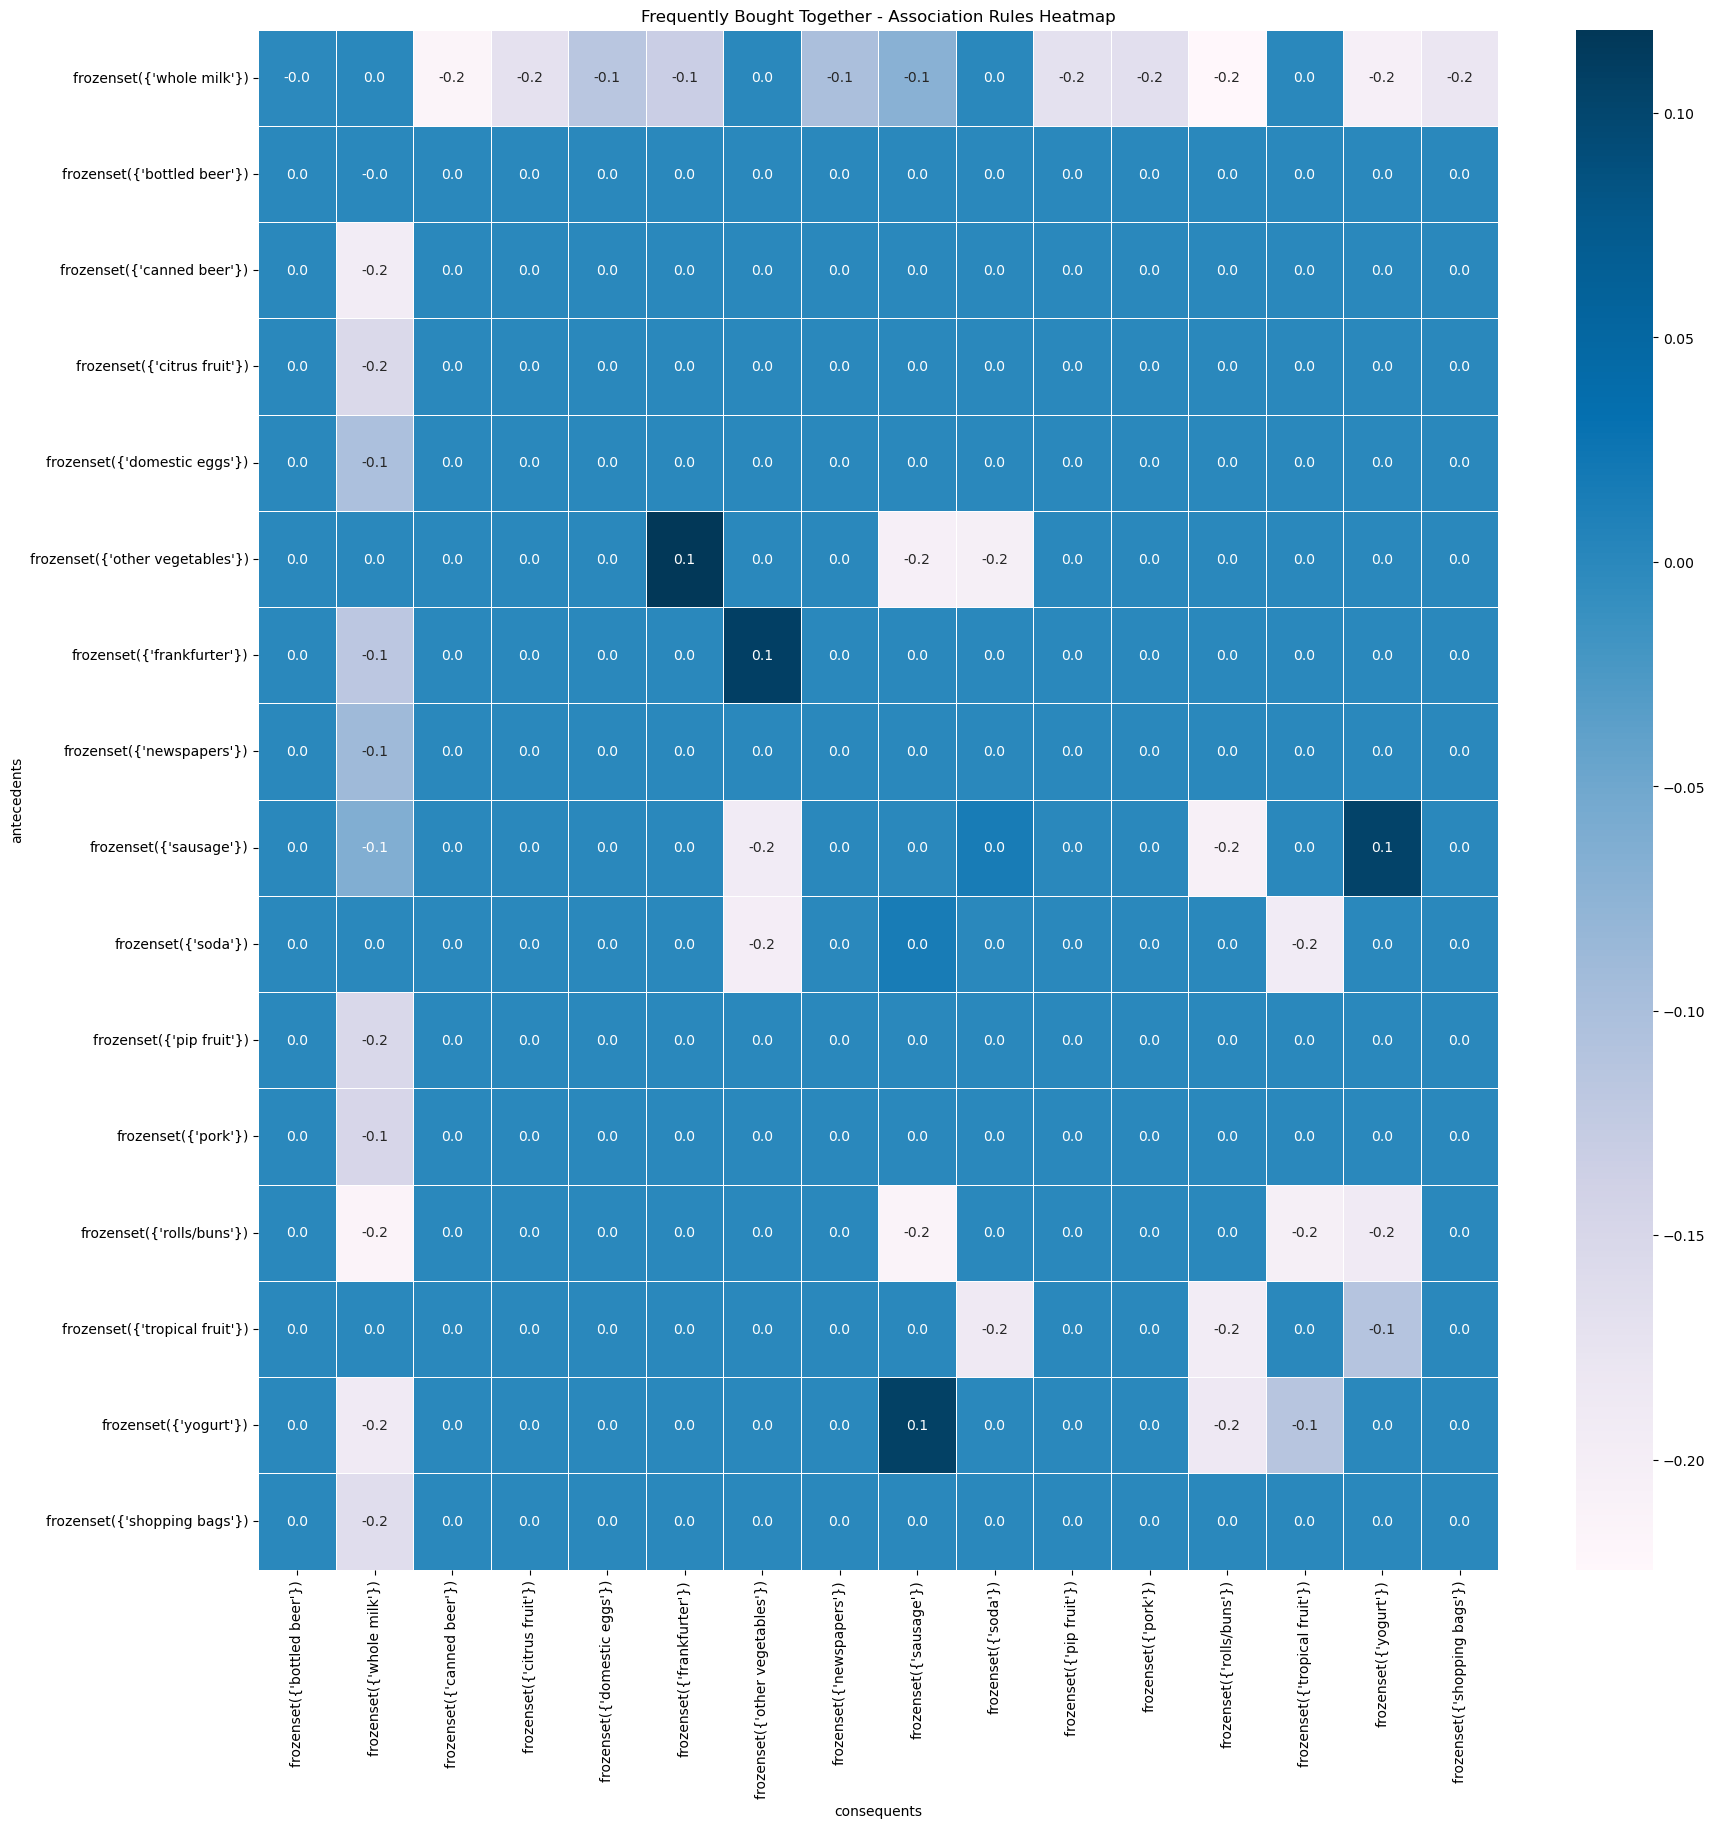

In [23]:
# Creating a matrix of product associations
product_associations = rules.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)

# Creating a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(product_associations, annot=True, cmap="PuBu", fmt=".1f", linewidths=.5)
plt.title("Frequently Bought Together - Association Rules Heatmap")
plt.show()

In [24]:
# Taking pairs with positive Zhang's metric in a separate dataframe

pos_pair = rules[rules['zhangs_metric'] > 0]

pos_pair.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,0.118536
9,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
30,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613,0.015702
31,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963,0.016341
34,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345,0.104587


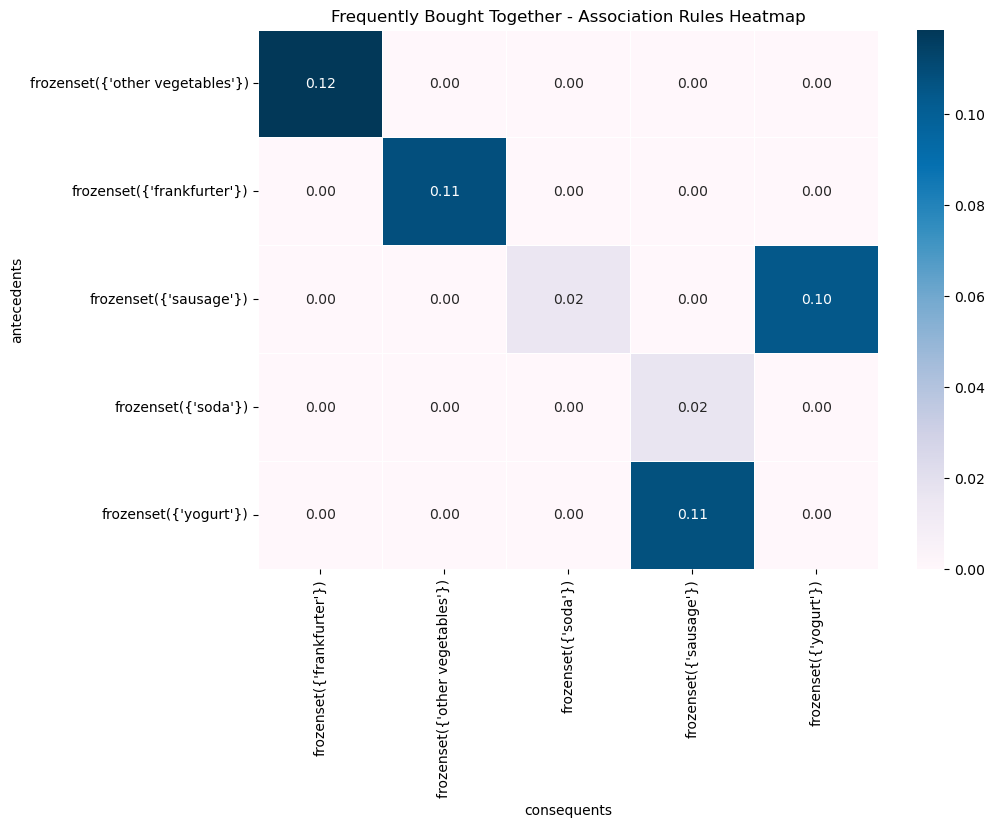

In [25]:
# Creating a matrix of product associations
pos_association = pos_pair.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(pos_association, annot=True, cmap="PuBu", fmt=".2f", linewidths=.5)
plt.title("Frequently Bought Together - Association Rules Heatmap")
plt.show()